In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Works/Personal/repo/PYTORCH_NOTEBOOKS/Data/NYCTaxiFares.csv')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [3]:
df['fare_class'].value_counts()

0    80000
1    40000
Name: fare_class, dtype: int64

In [4]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [5]:
df['dist_km'] = haversine_distance(df,'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [6]:
df['EDTdate'] = pd.to_datetime(df['pickup_datetime'].str[:19]) - pd.Timedelta(hours=4)
df['Hour'] = df['EDTdate'].dt.hour
df['AMorPM'] = np.where(df['Hour']<12,'am','pm')
df['Weekday'] = df['EDTdate'].dt.strftime("%a")
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56,4,am,Mon
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53,11,am,Sat
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26,7,am,Sat
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03,17,pm,Sun
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01,22,pm,Fri


In [7]:
df['EDTdate'].min()

Timestamp('2010-04-11 00:00:10')

In [8]:
df['EDTdate'].max()

Timestamp('2010-04-24 23:59:42')

In [9]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [10]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'dist_km']
y_col = ['fare_class']  # this column contains the labels

In [11]:
#Converting THE three categorical columns to category dtypes.
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [14]:
df.dtypes

pickup_datetime              object
fare_amount                 float64
fare_class                    int64
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dist_km                     float64
EDTdate              datetime64[ns]
Hour                       category
AMorPM                     category
Weekday                    category
dtype: object

In [15]:
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [16]:
df['AMorPM'].head()

0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): [am, pm]

In [17]:
df['Weekday'].head()

0    Mon
1    Sat
2    Sat
3    Sun
4    Fri
Name: Weekday, dtype: category
Categories (7, object): [Fri, Mon, Sat, Sun, Thu, Tue, Wed]

In [18]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

cats = np.stack([hr, ampm, wkdy], 1)

In [19]:
cats[:5]

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       [17,  1,  3],
       [22,  1,  0]], dtype=int8)

In [20]:
# Converting categorical variables to a tensor
cats = torch.tensor(cats, dtype=torch.int64)
# this syntax is ok, since the source data is an array, not an existing tensor

cats[:5]

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        [17,  1,  3],
        [22,  1,  0]])

In [21]:
# Converting continuous variables to a tensor
conts = np.stack([df[col].values for col in cont_cols], 1)
conts = torch.tensor(conts, dtype=torch.float)
conts[:5]

tensor([[ 40.7305, -73.9924,  40.7447, -73.9755,   1.0000,   2.1263],
        [ 40.7406, -73.9901,  40.7441, -73.9742,   1.0000,   1.3923],
        [ 40.7511, -73.9941,  40.7662, -73.9601,   2.0000,   3.3268],
        [ 40.7564, -73.9905,  40.7482, -73.9712,   1.0000,   1.8641],
        [ 40.7342, -73.9910,  40.7431, -73.9060,   1.0000,   7.2313]])

In [22]:
conts.type()

'torch.FloatTensor'

In [23]:
# Converting labels to a tensor
y = torch.tensor(df[y_col].values).flatten()

y[:5]

tensor([0, 0, 1, 0, 1])

In [24]:
# This will set embedding sizes for Hours, AMvsPM and Weekdays
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [25]:
catz = cats[:4]
catz

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        [17,  1,  3]])

In [26]:
# This is assigned inside the __init__() method
selfembeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [27]:
# This happens inside the forward() method
embeddingz = []
for i,e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))
embeddingz

[tensor([[-0.9355, -0.3726, -0.5691,  0.6221,  0.2933,  1.0205,  0.5301,  2.7899,
          -0.0780, -0.5863,  0.9047,  1.9037],
         [-0.6202,  1.0942, -0.2080, -0.4816, -0.4255,  1.7307,  0.2576,  2.1539,
          -0.9053, -0.6732,  1.7080, -2.9386],
         [ 0.2498, -0.9372, -0.5354,  1.2232, -1.3365, -2.0791,  0.7334,  0.0173,
          -1.1665, -1.0701,  0.9297, -0.4429],
         [ 0.4343, -1.0297, -0.3098, -0.4438, -0.4105, -1.6751,  0.3495, -0.8428,
           0.3372, -0.8269, -0.1318, -0.6016]], grad_fn=<EmbeddingBackward>),
 tensor([[-1.7851],
         [-1.7851],
         [-1.7851],
         [-0.2081]], grad_fn=<EmbeddingBackward>),
 tensor([[ 0.0597, -1.7594,  0.5150, -0.4192],
         [ 2.2776,  0.2105,  0.0041,  1.4730],
         [ 2.2776,  0.2105,  0.0041,  1.4730],
         [ 0.2078, -0.4218,  0.2737,  1.4897]], grad_fn=<EmbeddingBackward>)]

In [28]:
# the embedding sections (12,1,4) is concataneted into one (17)
z = torch.cat(embeddingz, 1)
z

tensor([[-0.9355, -0.3726, -0.5691,  0.6221,  0.2933,  1.0205,  0.5301,  2.7899,
         -0.0780, -0.5863,  0.9047,  1.9037, -1.7851,  0.0597, -1.7594,  0.5150,
         -0.4192],
        [-0.6202,  1.0942, -0.2080, -0.4816, -0.4255,  1.7307,  0.2576,  2.1539,
         -0.9053, -0.6732,  1.7080, -2.9386, -1.7851,  2.2776,  0.2105,  0.0041,
          1.4730],
        [ 0.2498, -0.9372, -0.5354,  1.2232, -1.3365, -2.0791,  0.7334,  0.0173,
         -1.1665, -1.0701,  0.9297, -0.4429, -1.7851,  2.2776,  0.2105,  0.0041,
          1.4730],
        [ 0.4343, -1.0297, -0.3098, -0.4438, -0.4105, -1.6751,  0.3495, -0.8428,
          0.3372, -0.8269, -0.1318, -0.6016, -0.2081,  0.2078, -0.4218,  0.2737,
          1.4897]], grad_fn=<CatBackward>)

In [29]:
# This was assigned under the __init__() method
selfembdrop = nn.Dropout(.4)

In [30]:
z = selfembdrop(z)
z

tensor([[-0.0000, -0.0000, -0.9485,  1.0369,  0.0000,  1.7008,  0.8835,  0.0000,
         -0.1300, -0.0000,  0.0000,  3.1728, -0.0000,  0.0000, -0.0000,  0.8583,
         -0.6987],
        [-0.0000,  1.8237, -0.3467, -0.0000, -0.7092,  2.8844,  0.4293,  0.0000,
         -1.5089, -1.1221,  2.8467, -4.8976, -0.0000,  0.0000,  0.3508,  0.0068,
          0.0000],
        [ 0.4164, -0.0000, -0.0000,  2.0387, -2.2275, -3.4652,  1.2224,  0.0000,
         -0.0000, -1.7835,  1.5495, -0.7382, -2.9752,  3.7959,  0.3508,  0.0068,
          2.4549],
        [ 0.7239, -1.7162, -0.0000, -0.7396, -0.0000, -2.7918,  0.0000, -1.4047,
          0.0000, -0.0000, -0.0000, -0.0000, -0.0000,  0.0000, -0.7030,  0.0000,
          2.4828]], grad_fn=<MulBackward0>)

In [31]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [32]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1], 2, [200,100], p=0.4) # out_sz = 2

In [33]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4)
    (8): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [35]:
batch_size = 60000
test_size = 12000

cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [36]:
import time
start_time = time.time()

epochs = 300
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') 

epoch:   1  loss: 0.73441482
epoch:  26  loss: 0.45090991
epoch:  51  loss: 0.35915938
epoch:  76  loss: 0.31940848
epoch: 101  loss: 0.29913244
epoch: 126  loss: 0.28824982
epoch: 151  loss: 0.28091952
epoch: 176  loss: 0.27713534
epoch: 201  loss: 0.27236161
epoch: 226  loss: 0.27171907
epoch: 251  loss: 0.26830241
epoch: 276  loss: 0.26365638
epoch: 300  loss: 0.25949642

Duration: 1003 seconds


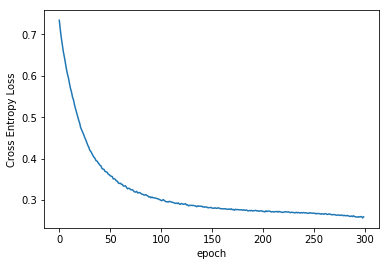

In [39]:
plt.plot(range(epochs), losses)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch');

In [40]:
# EVALUATING THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = criterion(y_val, y_test)
print(f'CE Loss: {loss:.8f}')

CE Loss: 0.25455481


In [41]:
rows = 50
correct = 0
print(f'{"MODEL OUTPUT":26} ARGMAX  Y_TEST')
for i in range(rows):
    print(f'{str(y_val[i]):26} {y_val[i].argmax():^7}{y_test[i]:^7}')
    if y_val[i].argmax().item() == y_test[i]:
        correct += 1
print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct')

MODEL OUTPUT               ARGMAX  Y_TEST
tensor([ 1.8140, -1.6443])    0      0   
tensor([-1.8268,  2.6373])    1      0   
tensor([ 1.4028, -1.9248])    0      0   
tensor([-1.9130,  1.4853])    1      1   
tensor([ 1.1757, -2.4964])    0      0   
tensor([ 2.0996, -2.2990])    0      0   
tensor([ 1.3226, -1.8349])    0      0   
tensor([-1.6211,  2.3889])    1      1   
tensor([ 2.2489, -2.4253])    0      0   
tensor([-0.4459,  1.1358])    1      1   
tensor([ 1.5145, -2.1619])    0      0   
tensor([ 0.7704, -1.9443])    0      0   
tensor([ 0.9637, -1.3796])    0      0   
tensor([-1.3527,  1.7322])    1      1   
tensor([ 1.4110, -2.4595])    0      0   
tensor([-1.4455,  2.6081])    1      1   
tensor([ 2.2798, -2.5864])    0      1   
tensor([ 1.4585, -2.7982])    0      0   
tensor([ 0.3342, -0.8995])    0      0   
tensor([ 2.0525, -1.9737])    0      0   
tensor([-1.3571,  2.1911])    1      1   
tensor([-0.4669,  0.2872])    1      1   
tensor([-2.0624,  2.2875])    1   

In [42]:
# Make sure to save the model only after the training has happened!
if len(losses) == epochs:
    torch.save(model.state_dict(), 'TaxiFareClssModel.pt')
else:
    print('Model has not been trained. Consider loading a trained model instead.')